In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
import tensorflow as tf
import keras

In [3]:
dataset_train = pd.read_csv('output_Result0.csv')


In [4]:
dataset_train

,F1,F2,F3,F4
0,401.203,1003.485,949.140,792.094
1,421.250,1021.578,925.547,788.015
2,425.719,1035.750,907.328,704.781
3,431.235,1042.703,900.469,766.844
4,433.390,1044.985,902.468,781.000
...,...,...,...,...
632,209.157,482.406,623.969,714.625
633,202.657,491.234,627.188,690.843
634,203.046,492.938,615.297,720.390
635,107.875,419.500,693.657,744.625


In [5]:
dataset_train=dataset_train.rolling(10).mean()

In [6]:
dataset_train

,F1,F2,F3,F4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
632,186.1922,471.4906,650.2078,736.2451
633,186.3235,473.4359,651.3828,732.0997
634,186.9906,475.8813,652.2797,733.2419
635,192.5687,486.7563,647.7283,724.8138


In [7]:
dataset_train.head(10)

,F1,F2,F3,F4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,434.311,1037.8001,901.6749,741.1248


In [8]:
dataset_train=dataset_train.iloc[9:,:].values

In [9]:
dataset_train

array([[ 434.311 , 1037.8001,  901.6749,  741.1248],
       [ 439.2438, 1041.3719,  895.6578,  733.381 ],
       [ 439.9047, 1040.8891,  887.2797,  722.4185],
       ...,
       [ 186.9906,  475.8813,  652.2797,  733.2419],
       [ 192.5687,  486.7563,  647.7283,  724.8138],
       [ 189.6234,  481.9984,  642.6893,  723.8966]])

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_train_scaled = sc.fit_transform(dataset_train)

In [11]:
dataset_train_scaled

array([[0.96737777, 0.90778795, 0.80694798, 0.37373319],
       [0.97863714, 0.91125169, 0.79699429, 0.35879472],
       [0.98014568, 0.91078349, 0.78313496, 0.3376471 ],
       ...,
       [0.4028562 , 0.36286962, 0.3943901 , 0.35852639],
       [0.4155885 , 0.37341561, 0.38686102, 0.34226784],
       [0.4088657 , 0.36880165, 0.37852534, 0.34049848]])

In [12]:
dataset_train_scaled.shape

(628, 4)

In [13]:
dataset_train_result = pd.read_csv('SOH_RESULT12.csv')


In [14]:
dataset_train_result

,SOH
0,0.928244
1,0.923164
2,0.917675
3,0.917631
4,0.917323
...,...
632,0.677398
633,0.670526
634,0.666465
635,0.665487


In [15]:
dataset_train_result=dataset_train_result.rolling(10).mean()

In [16]:
dataset_train_result

,SOH
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
632,0.686977
633,0.683707
634,0.680679
635,0.677815


In [17]:
dataset_train_result.head(10)

,SOH
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,0.917701


In [18]:
dataset_train_result=dataset_train_result.iloc[9:,:].values

In [19]:
dataset_train_result

array([[0.91770118],
       [0.91610779],
       [0.91450152],
       [0.91342167],
       [0.91233057],
       [0.91072819],
       [0.90905045],
       [0.90742212],
       [0.9062877 ],
       [0.90518789],
       [0.90630852],
       [0.90744841],
       [0.90854719],
       [0.90914862],
       [0.90973227],
       [0.91088145],
       [0.91147766],
       [0.91208714],
       [0.9126322 ],
       [0.9126316 ],
       [0.91048415],
       [0.91070341],
       [0.91042974],
       [0.9096061 ],
       [0.90858091],
       [0.90727069],
       [0.90599129],
       [0.90439899],
       [0.9023522 ],
       [0.90086581],
       [0.89905556],
       [0.89458119],
       [0.89142686],
       [0.88909488],
       [0.88645091],
       [0.88357453],
       [0.88095694],
       [0.88149199],
       [0.88199975],
       [0.88171608],
       [0.88117336],
       [0.88040114],
       [0.87910614],
       [0.87779384],
       [0.8765234 ],
       [0.87522125],
       [0.87394335],
       [0.869

In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_setY_scaled = sc.fit_transform(dataset_train_result)

In [21]:
training_setY_scaled.shape


(628, 1)

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and remaining data
X_train, X_rem, y_train, y_rem = train_test_split(dataset_train_scaled, training_setY_scaled, test_size=0.3,shuffle=False, random_state=42)



In [23]:

# Split the remaining data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5,shuffle=False, random_state=42)

In [24]:
X_train


array([[0.96737777, 0.90778795, 0.80694798, 0.37373319],
       [0.97863714, 0.91125169, 0.79699429, 0.35879472],
       [0.98014568, 0.91078349, 0.78313496, 0.3376471 ],
       ...,
       [0.46714587, 0.62600255, 0.70547366, 0.35846986],
       [0.4637791 , 0.62283866, 0.70320174, 0.36007351],
       [0.45968124, 0.61891729, 0.70050831, 0.36243047]])

In [25]:
print(X_train.shape), print(y_train.shape),print(X_val.shape), print(y_val.shape),print(X_test.shape), print(y_test.shape)

(439, 4)
(439, 1)
(94, 4)
(94, 1)
(95, 4)
(95, 1)


(None, None, None, None, None, None)

In [26]:
(X_train.shape[1], 1)

(4, 1)

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Activation
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense,add, concatenate
from keras.callbacks import Callback
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization


In [28]:

initial_lr = 0.01
decay_rate = 0.99
decay_steps = 10000

class LearningRateUpdater(Callback):
    def __init__(self, initial_lr, decay_rate, decay_steps):
        super(LearningRateUpdater, self).__init__()
        self.initial_lr = initial_lr
        self.decay_rate = decay_rate
        self.decay_steps = decay_steps

    def on_epoch_begin(self, epoch, logs=None):
        lr = self.initial_lr * math.pow(self.decay_rate, (epoch + 1) // self.decay_steps)
        self.model.optimizer.lr.assign(lr)
        print("Learning rate updated to:", lr)


# Create the optimizer with the initial learning rate
optimizer = Adam(learning_rate=initial_lr)




# Create the learning rate updater callback
lr_updater_callback = LearningRateUpdater(initial_lr, decay_rate, decay_steps)



In [29]:
# def lr_scheduler(epoch, lr):
#     if epoch % 10000 == 0 and epoch > 0:
#         lr *= 0.99
#     return lr
# def lr_scheduler(epoch, lr):
        
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_lr, decay_steps=decay_steps, decay_rate=decay_rate, staircase=False)


# lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

In [30]:
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

In [31]:
class LearningRateLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.lr
        if isinstance(lr, tf.keras.optimizers.schedules.LearningRateSchedule):
            lr = lr(self.model.optimizer.iterations)
        print(f'\nLearning rate after epoch {epoch} is {lr:.4f}\n')

In [32]:
input_shape =(X_train.shape[1], 1)
input = Input(shape=input_shape)

In [33]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense,add, concatenate, Dropout, Reshape,Lambda,Flatten

rnn_1 =GRU(units=11)(input)
dropout1 = Dropout(rate=0.15)(rnn_1)

rnn_2 = GRU(units=11)(input)
dropout2 = Dropout(rate=0.15)(rnn_2)

rnn_3 =GRU(units=11)(input)
dropout3 = Dropout(rate=0.15)(rnn_3)

rnn_4 = GRU(units=11)(input)
dropout4 = Dropout(rate=0.15)(rnn_4)


merged = concatenate([dropout1, dropout2,dropout3, dropout4], axis=1)

dense1 = Dense(units=50, activation='tanh', kernel_regularizer=regularizers.l1(0.001))(merged)
dense1 = BatchNormalization()(dense1)
dense2 = Dense(units=25, activation='relu', kernel_regularizer=regularizers.l1(0.001))(dense1)
dense2 = BatchNormalization()(dense2)


# Define the output layer
output = Dense(units=1, activation='sigmoid')(dense2)

# Create the model with the inputs and output
model = Model(inputs=[input], outputs=output)

# Compile the model with the desired optimizer, loss function, and metrics
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model with the training data
model.fit([X_train], y_train, epochs=1000, batch_size=25, validation_data=([X_val], y_val), callbacks=[LearningRateLogger()])


Epoch 1/1000
 1/18 [>.............................] - ETA: 47s - loss: 0.5459 - mae: 0.2301
Learning rate after epoch 0 is 0.0100

18/18 [==============================] - 4s 62ms/step - loss: 0.3882 - mae: 0.1272 - val_loss: 0.2717 - val_mae: 0.1372
Epoch 2/1000
16/18 [=========================>....] - ETA: 0s - loss: 0.1897 - mae: 0.0832
Learning rate after epoch 1 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.1837 - mae: 0.0812 - val_loss: 0.1357 - val_mae: 0.1384
Epoch 3/1000
18/18 [==============================] - ETA: 0s - loss: 0.0816 - mae: 0.0688
Learning rate after epoch 2 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0816 - mae: 0.0688 - val_loss: 0.0748 - val_mae: 0.1412
Epoch 4/1000
18/18 [==============================] - ETA: 0s - loss: 0.0420 - mae: 0.0749
Learning rate after epoch 3 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0420 - mae: 0.0749 - val_loss: 0.0517 - val_mae: 0.1462
Ep

Epoch 34/1000
18/18 [==============================] - ETA: 0s - loss: 0.0082 - mae: 0.0486
Learning rate after epoch 33 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0082 - mae: 0.0486 - val_loss: 0.0155 - val_mae: 0.0741
Epoch 35/1000
18/18 [==============================] - ETA: 0s - loss: 0.0079 - mae: 0.0463
Learning rate after epoch 34 is 0.0100

18/18 [==============================] - 0s 6ms/step - loss: 0.0079 - mae: 0.0463 - val_loss: 0.0140 - val_mae: 0.0769
Epoch 36/1000
16/18 [=========================>....] - ETA: 0s - loss: 0.0085 - mae: 0.0484
Learning rate after epoch 35 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0088 - mae: 0.0502 - val_loss: 0.0082 - val_mae: 0.0540
Epoch 37/1000
18/18 [==============================] - ETA: 0s - loss: 0.0104 - mae: 0.0592
Learning rate after epoch 36 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0104 - mae: 0.0592 - val_loss: 0.0137 - val_mae: 0.0

Epoch 67/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0091 - mae: 0.0534
Learning rate after epoch 66 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0095 - mae: 0.0553 - val_loss: 0.0133 - val_mae: 0.0794
Epoch 68/1000
18/18 [==============================] - ETA: 0s - loss: 0.0087 - mae: 0.0508
Learning rate after epoch 67 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0087 - mae: 0.0508 - val_loss: 0.0108 - val_mae: 0.0729
Epoch 69/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0091 - mae: 0.0511
Learning rate after epoch 68 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0090 - mae: 0.0506 - val_loss: 0.0110 - val_mae: 0.0730
Epoch 70/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0092 - mae: 0.0536
Learning rate after epoch 69 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0094 - mae: 0.0546 - val_loss: 0.0059 - val_mae: 0.0

Epoch 100/1000
18/18 [==============================] - ETA: 0s - loss: 0.0087 - mae: 0.0494
Learning rate after epoch 99 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0087 - mae: 0.0494 - val_loss: 0.0128 - val_mae: 0.0838
Epoch 101/1000
18/18 [==============================] - ETA: 0s - loss: 0.0077 - mae: 0.0425
Learning rate after epoch 100 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0077 - mae: 0.0425 - val_loss: 0.0088 - val_mae: 0.0591
Epoch 102/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0093 - mae: 0.0522
Learning rate after epoch 101 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0092 - mae: 0.0517 - val_loss: 0.0110 - val_mae: 0.0715
Epoch 103/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0127 - mae: 0.0792
Learning rate after epoch 102 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0101 - mae: 0.0591 - val_loss: 0.0174 - val_m


18/18 [==============================] - 0s 5ms/step - loss: 0.0082 - mae: 0.0495 - val_loss: 0.0540 - val_mae: 0.2170
Epoch 133/1000
18/18 [==============================] - ETA: 0s - loss: 0.0084 - mae: 0.0503
Learning rate after epoch 132 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0084 - mae: 0.0503 - val_loss: 0.0552 - val_mae: 0.2061
Epoch 134/1000
18/18 [==============================] - ETA: 0s - loss: 0.0076 - mae: 0.0447
Learning rate after epoch 133 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0076 - mae: 0.0447 - val_loss: 0.0323 - val_mae: 0.1616
Epoch 135/1000
18/18 [==============================] - ETA: 0s - loss: 0.0082 - mae: 0.0498
Learning rate after epoch 134 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0082 - mae: 0.0498 - val_loss: 0.0500 - val_mae: 0.1942
Epoch 136/1000
18/18 [==============================] - ETA: 0s - loss: 0.0090 - mae: 0.0531
Learning rate after epoch 13

Epoch 165/1000
18/18 [==============================] - ETA: 0s - loss: 0.0079 - mae: 0.0452
Learning rate after epoch 164 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0079 - mae: 0.0452 - val_loss: 0.0085 - val_mae: 0.0594
Epoch 166/1000
18/18 [==============================] - ETA: 0s - loss: 0.0104 - mae: 0.0610
Learning rate after epoch 165 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0104 - mae: 0.0610 - val_loss: 0.0173 - val_mae: 0.0844
Epoch 167/1000
18/18 [==============================] - ETA: 0s - loss: 0.0082 - mae: 0.0457
Learning rate after epoch 166 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0082 - mae: 0.0457 - val_loss: 0.0146 - val_mae: 0.0813
Epoch 168/1000
18/18 [==============================] - ETA: 0s - loss: 0.0100 - mae: 0.0505
Learning rate after epoch 167 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0100 - mae: 0.0505 - val_loss: 0.0405 - val_

Epoch 198/1000
18/18 [==============================] - ETA: 0s - loss: 0.0096 - mae: 0.0524
Learning rate after epoch 197 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0096 - mae: 0.0524 - val_loss: 0.0176 - val_mae: 0.0918
Epoch 199/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0108 - mae: 0.0578
Learning rate after epoch 198 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0107 - mae: 0.0569 - val_loss: 0.0293 - val_mae: 0.1503
Epoch 200/1000
15/18 [========================>.....] - ETA: 0s - loss: 0.0083 - mae: 0.0469
Learning rate after epoch 199 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0082 - mae: 0.0462 - val_loss: 0.0873 - val_mae: 0.2850
Epoch 201/1000
18/18 [==============================] - ETA: 0s - loss: 0.0097 - mae: 0.0562
Learning rate after epoch 200 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0097 - mae: 0.0562 - val_loss: 0.0114 - val_

Epoch 231/1000
18/18 [==============================] - ETA: 0s - loss: 0.0087 - mae: 0.0492
Learning rate after epoch 230 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0087 - mae: 0.0492 - val_loss: 0.0067 - val_mae: 0.0393
Epoch 232/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0103 - mae: 0.0542
Learning rate after epoch 231 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0102 - mae: 0.0538 - val_loss: 0.0067 - val_mae: 0.0348
Epoch 233/1000
18/18 [==============================] - ETA: 0s - loss: 0.0087 - mae: 0.0504
Learning rate after epoch 232 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0087 - mae: 0.0504 - val_loss: 0.0134 - val_mae: 0.0797
Epoch 234/1000
18/18 [==============================] - ETA: 0s - loss: 0.0087 - mae: 0.0516
Learning rate after epoch 233 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0087 - mae: 0.0516 - val_loss: 0.0196 - val_


18/18 [==============================] - 0s 5ms/step - loss: 0.0096 - mae: 0.0555 - val_loss: 0.0096 - val_mae: 0.0648
Epoch 264/1000
18/18 [==============================] - ETA: 0s - loss: 0.0088 - mae: 0.0506
Learning rate after epoch 263 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0088 - mae: 0.0506 - val_loss: 0.0156 - val_mae: 0.0912
Epoch 265/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0070 - mae: 0.0367
Learning rate after epoch 264 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0070 - mae: 0.0365 - val_loss: 0.0062 - val_mae: 0.0338
Epoch 266/1000
18/18 [==============================] - ETA: 0s - loss: 0.0085 - mae: 0.0480
Learning rate after epoch 265 is 0.0100

18/18 [==============================] - 0s 5ms/step - loss: 0.0085 - mae: 0.0480 - val_loss: 0.0108 - val_mae: 0.0705
Epoch 267/1000
18/18 [==============================] - ETA: 0s - loss: 0.0080 - mae: 0.0450
Learning rate after epoch 26

Epoch 296/1000
18/18 [==============================] - ETA: 0s - loss: 0.0088 - mae: 0.0513
Learning rate after epoch 295 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0088 - mae: 0.0513 - val_loss: 0.0167 - val_mae: 0.0954
Epoch 297/1000
18/18 [==============================] - ETA: 0s - loss: 0.0098 - mae: 0.0532
Learning rate after epoch 296 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0098 - mae: 0.0532 - val_loss: 0.0456 - val_mae: 0.1826
Epoch 298/1000
18/18 [==============================] - ETA: 0s - loss: 0.0089 - mae: 0.0492
Learning rate after epoch 297 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0089 - mae: 0.0492 - val_loss: 0.0062 - val_mae: 0.0325
Epoch 299/1000
18/18 [==============================] - ETA: 0s - loss: 0.0087 - mae: 0.0500
Learning rate after epoch 298 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0087 - mae: 0.0500 - val_loss: 0.0098 - val_


18/18 [==============================] - 0s 5ms/step - loss: 0.0101 - mae: 0.0513 - val_loss: 0.0120 - val_mae: 0.0771
Epoch 329/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0088 - mae: 0.0488
Learning rate after epoch 328 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0088 - mae: 0.0484 - val_loss: 0.0095 - val_mae: 0.0519
Epoch 330/1000
18/18 [==============================] - ETA: 0s - loss: 0.0081 - mae: 0.0451
Learning rate after epoch 329 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0081 - mae: 0.0451 - val_loss: 0.0128 - val_mae: 0.0846
Epoch 331/1000
18/18 [==============================] - ETA: 0s - loss: 0.0079 - mae: 0.0449
Learning rate after epoch 330 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0079 - mae: 0.0449 - val_loss: 0.0115 - val_mae: 0.0712
Epoch 332/1000
18/18 [==============================] - ETA: 0s - loss: 0.0098 - mae: 0.0542
Learning rate after epoch 33

Epoch 361/1000
18/18 [==============================] - ETA: 0s - loss: 0.0091 - mae: 0.0484
Learning rate after epoch 360 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0091 - mae: 0.0484 - val_loss: 0.0139 - val_mae: 0.0663
Epoch 362/1000
18/18 [==============================] - ETA: 0s - loss: 0.0094 - mae: 0.0523
Learning rate after epoch 361 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0094 - mae: 0.0523 - val_loss: 0.0091 - val_mae: 0.0610
Epoch 363/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0097 - mae: 0.0531
Learning rate after epoch 362 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0096 - mae: 0.0524 - val_loss: 0.0081 - val_mae: 0.0498
Epoch 364/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0098 - mae: 0.0545
Learning rate after epoch 363 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0099 - mae: 0.0551 - val_loss: 0.0372 - val_

Epoch 394/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0082 - mae: 0.0458
Learning rate after epoch 393 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0083 - mae: 0.0465 - val_loss: 0.0771 - val_mae: 0.2583
Epoch 395/1000
18/18 [==============================] - ETA: 0s - loss: 0.0098 - mae: 0.0541
Learning rate after epoch 394 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0098 - mae: 0.0541 - val_loss: 0.0133 - val_mae: 0.0792
Epoch 396/1000
18/18 [==============================] - ETA: 0s - loss: 0.0098 - mae: 0.0524
Learning rate after epoch 395 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0098 - mae: 0.0524 - val_loss: 0.0102 - val_mae: 0.0697
Epoch 397/1000
18/18 [==============================] - ETA: 0s - loss: 0.0083 - mae: 0.0458
Learning rate after epoch 396 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0083 - mae: 0.0458 - val_loss: 0.0113 - val_


18/18 [==============================] - 0s 5ms/step - loss: 0.0078 - mae: 0.0410 - val_loss: 0.0119 - val_mae: 0.0832
Epoch 427/1000
18/18 [==============================] - ETA: 0s - loss: 0.0075 - mae: 0.0417
Learning rate after epoch 426 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0075 - mae: 0.0417 - val_loss: 0.0057 - val_mae: 0.0249
Epoch 428/1000
18/18 [==============================] - ETA: 0s - loss: 0.0083 - mae: 0.0493
Learning rate after epoch 427 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0083 - mae: 0.0493 - val_loss: 0.0100 - val_mae: 0.0490
Epoch 429/1000
18/18 [==============================] - ETA: 0s - loss: 0.0088 - mae: 0.0497
Learning rate after epoch 428 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0088 - mae: 0.0497 - val_loss: 0.0083 - val_mae: 0.0409
Epoch 430/1000
18/18 [==============================] - ETA: 0s - loss: 0.0077 - mae: 0.0428
Learning rate after epoch 42

Epoch 459/1000
18/18 [==============================] - ETA: 0s - loss: 0.0075 - mae: 0.0430
Learning rate after epoch 458 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0075 - mae: 0.0430 - val_loss: 0.0080 - val_mae: 0.0479
Epoch 460/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0069 - mae: 0.0354
Learning rate after epoch 459 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0069 - mae: 0.0355 - val_loss: 0.0198 - val_mae: 0.1083
Epoch 461/1000
18/18 [==============================] - ETA: 0s - loss: 0.0116 - mae: 0.0637
Learning rate after epoch 460 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0116 - mae: 0.0637 - val_loss: 0.0065 - val_mae: 0.0307
Epoch 462/1000
18/18 [==============================] - ETA: 0s - loss: 0.0088 - mae: 0.0461
Learning rate after epoch 461 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0088 - mae: 0.0461 - val_loss: 0.0749 - val_


18/18 [==============================] - 0s 5ms/step - loss: 0.0110 - mae: 0.0582 - val_loss: 0.0264 - val_mae: 0.1374
Epoch 492/1000
18/18 [==============================] - ETA: 0s - loss: 0.0096 - mae: 0.0472
Learning rate after epoch 491 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0096 - mae: 0.0472 - val_loss: 0.0079 - val_mae: 0.0509
Epoch 493/1000
18/18 [==============================] - ETA: 0s - loss: 0.0098 - mae: 0.0515
Learning rate after epoch 492 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0098 - mae: 0.0515 - val_loss: 0.0100 - val_mae: 0.0660
Epoch 494/1000
18/18 [==============================] - ETA: 0s - loss: 0.0085 - mae: 0.0461
Learning rate after epoch 493 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0085 - mae: 0.0461 - val_loss: 0.0066 - val_mae: 0.0343
Epoch 495/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0077 - mae: 0.0427
Learning rate after epoch 49

Epoch 524/1000
18/18 [==============================] - ETA: 0s - loss: 0.0102 - mae: 0.0550
Learning rate after epoch 523 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0102 - mae: 0.0550 - val_loss: 0.0151 - val_mae: 0.0982
Epoch 525/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0084 - mae: 0.0443
Learning rate after epoch 524 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0086 - mae: 0.0456 - val_loss: 0.0079 - val_mae: 0.0495
Epoch 526/1000
18/18 [==============================] - ETA: 0s - loss: 0.0081 - mae: 0.0425
Learning rate after epoch 525 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0081 - mae: 0.0425 - val_loss: 0.1078 - val_mae: 0.3070
Epoch 527/1000
18/18 [==============================] - ETA: 0s - loss: 0.0076 - mae: 0.0400
Learning rate after epoch 526 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0076 - mae: 0.0400 - val_loss: 0.0248 - val_


18/18 [==============================] - 0s 5ms/step - loss: 0.0079 - mae: 0.0448 - val_loss: 0.0100 - val_mae: 0.0649
Epoch 557/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0079 - mae: 0.0456
Learning rate after epoch 556 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0079 - mae: 0.0458 - val_loss: 0.0180 - val_mae: 0.0997
Epoch 558/1000
15/18 [========================>.....] - ETA: 0s - loss: 0.0080 - mae: 0.0465
Learning rate after epoch 557 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0081 - mae: 0.0472 - val_loss: 0.0223 - val_mae: 0.1235
Epoch 559/1000
18/18 [==============================] - ETA: 0s - loss: 0.0088 - mae: 0.0521
Learning rate after epoch 558 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0088 - mae: 0.0521 - val_loss: 0.0240 - val_mae: 0.1203
Epoch 560/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0488 - mae: 0.0591
Learning rate after epoch 55

Epoch 589/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0077 - mae: 0.0434
Learning rate after epoch 588 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0081 - mae: 0.0457 - val_loss: 0.0111 - val_mae: 0.0769
Epoch 590/1000
18/18 [==============================] - ETA: 0s - loss: 0.0078 - mae: 0.0448
Learning rate after epoch 589 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0078 - mae: 0.0448 - val_loss: 0.0051 - val_mae: 0.0125
Epoch 591/1000
18/18 [==============================] - ETA: 0s - loss: 0.0097 - mae: 0.0557
Learning rate after epoch 590 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0097 - mae: 0.0557 - val_loss: 0.0060 - val_mae: 0.0325
Epoch 592/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0082 - mae: 0.0445
Learning rate after epoch 591 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0082 - mae: 0.0447 - val_loss: 0.0065 - val_

Epoch 622/1000
18/18 [==============================] - ETA: 0s - loss: 0.0079 - mae: 0.0439
Learning rate after epoch 621 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0079 - mae: 0.0439 - val_loss: 0.0126 - val_mae: 0.0789
Epoch 623/1000
18/18 [==============================] - ETA: 0s - loss: 0.0074 - mae: 0.0421
Learning rate after epoch 622 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0074 - mae: 0.0421 - val_loss: 0.0153 - val_mae: 0.0909
Epoch 624/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0073 - mae: 0.0417
Learning rate after epoch 623 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0074 - mae: 0.0426 - val_loss: 0.0123 - val_mae: 0.0760
Epoch 625/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0076 - mae: 0.0454
Learning rate after epoch 624 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0077 - mae: 0.0459 - val_loss: 0.0111 - val_

Epoch 655/1000
18/18 [==============================] - ETA: 0s - loss: 0.0077 - mae: 0.0463
Learning rate after epoch 654 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0077 - mae: 0.0463 - val_loss: 0.0103 - val_mae: 0.0722
Epoch 656/1000
18/18 [==============================] - ETA: 0s - loss: 0.0090 - mae: 0.0542
Learning rate after epoch 655 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0090 - mae: 0.0542 - val_loss: 0.0071 - val_mae: 0.0494
Epoch 657/1000
18/18 [==============================] - ETA: 0s - loss: 0.0077 - mae: 0.0479
Learning rate after epoch 656 is 0.0099

18/18 [==============================] - 0s 6ms/step - loss: 0.0077 - mae: 0.0479 - val_loss: 0.0099 - val_mae: 0.0657
Epoch 658/1000
18/18 [==============================] - ETA: 0s - loss: 0.0075 - mae: 0.0462
Learning rate after epoch 657 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0075 - mae: 0.0462 - val_loss: 0.0064 - val_


18/18 [==============================] - 0s 5ms/step - loss: 0.0084 - mae: 0.0477 - val_loss: 0.0100 - val_mae: 0.0642
Epoch 688/1000
18/18 [==============================] - ETA: 0s - loss: 0.0081 - mae: 0.0469
Learning rate after epoch 687 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0081 - mae: 0.0469 - val_loss: 0.0111 - val_mae: 0.0715
Epoch 689/1000
18/18 [==============================] - ETA: 0s - loss: 0.0091 - mae: 0.0529
Learning rate after epoch 688 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0091 - mae: 0.0529 - val_loss: 0.0077 - val_mae: 0.0495
Epoch 690/1000
18/18 [==============================] - ETA: 0s - loss: 0.0083 - mae: 0.0496
Learning rate after epoch 689 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0083 - mae: 0.0496 - val_loss: 0.0073 - val_mae: 0.0465
Epoch 691/1000
18/18 [==============================] - ETA: 0s - loss: 0.0090 - mae: 0.0475
Learning rate after epoch 69

Epoch 720/1000
18/18 [==============================] - ETA: 0s - loss: 0.0099 - mae: 0.0542
Learning rate after epoch 719 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0099 - mae: 0.0542 - val_loss: 0.0205 - val_mae: 0.1143
Epoch 721/1000
18/18 [==============================] - ETA: 0s - loss: 0.0084 - mae: 0.0473
Learning rate after epoch 720 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0084 - mae: 0.0473 - val_loss: 0.0069 - val_mae: 0.0457
Epoch 722/1000
18/18 [==============================] - ETA: 0s - loss: 0.0079 - mae: 0.0480
Learning rate after epoch 721 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0079 - mae: 0.0480 - val_loss: 0.0158 - val_mae: 0.1021
Epoch 723/1000
18/18 [==============================] - ETA: 0s - loss: 0.0085 - mae: 0.0494
Learning rate after epoch 722 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0085 - mae: 0.0494 - val_loss: 0.0155 - val_


18/18 [==============================] - 0s 5ms/step - loss: 0.0085 - mae: 0.0445 - val_loss: 0.0077 - val_mae: 0.0454
Epoch 753/1000
18/18 [==============================] - ETA: 0s - loss: 0.0073 - mae: 0.0404
Learning rate after epoch 752 is 0.0099

18/18 [==============================] - 0s 7ms/step - loss: 0.0073 - mae: 0.0404 - val_loss: 0.0051 - val_mae: 0.0246
Epoch 754/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0064 - mae: 0.0357
Learning rate after epoch 753 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0064 - mae: 0.0356 - val_loss: 0.0050 - val_mae: 0.0138
Epoch 755/1000
18/18 [==============================] - ETA: 0s - loss: 0.0094 - mae: 0.0519
Learning rate after epoch 754 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0094 - mae: 0.0519 - val_loss: 0.0223 - val_mae: 0.1170
Epoch 756/1000
18/18 [==============================] - ETA: 0s - loss: 0.0083 - mae: 0.0483
Learning rate after epoch 75

Epoch 785/1000
18/18 [==============================] - ETA: 0s - loss: 0.0075 - mae: 0.0437
Learning rate after epoch 784 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0075 - mae: 0.0437 - val_loss: 0.0174 - val_mae: 0.1024
Epoch 786/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0093 - mae: 0.0529
Learning rate after epoch 785 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0093 - mae: 0.0526 - val_loss: 0.0125 - val_mae: 0.0779
Epoch 787/1000
18/18 [==============================] - ETA: 0s - loss: 0.0081 - mae: 0.0481
Learning rate after epoch 786 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0081 - mae: 0.0481 - val_loss: 0.0150 - val_mae: 0.0963
Epoch 788/1000
18/18 [==============================] - ETA: 0s - loss: 0.0080 - mae: 0.0442
Learning rate after epoch 787 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0080 - mae: 0.0442 - val_loss: 0.0065 - val_


18/18 [==============================] - 0s 5ms/step - loss: 0.0087 - mae: 0.0535 - val_loss: 0.0050 - val_mae: 0.0172
Epoch 818/1000
18/18 [==============================] - ETA: 0s - loss: 0.0081 - mae: 0.0484
Learning rate after epoch 817 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0081 - mae: 0.0484 - val_loss: 0.0073 - val_mae: 0.0424
Epoch 819/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0087 - mae: 0.0520
Learning rate after epoch 818 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0088 - mae: 0.0530 - val_loss: 0.0060 - val_mae: 0.0375
Epoch 820/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0072 - mae: 0.0431
Learning rate after epoch 819 is 0.0099

18/18 [==============================] - 0s 5ms/step - loss: 0.0072 - mae: 0.0429 - val_loss: 0.0083 - val_mae: 0.0571
Epoch 821/1000
18/18 [==============================] - ETA: 0s - loss: 0.0085 - mae: 0.0485
Learning rate after epoch 82

Epoch 850/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0078 - mae: 0.0436
Learning rate after epoch 849 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0077 - mae: 0.0432 - val_loss: 0.0200 - val_mae: 0.1171
Epoch 851/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0067 - mae: 0.0363
Learning rate after epoch 850 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0067 - mae: 0.0363 - val_loss: 0.0124 - val_mae: 0.0876
Epoch 852/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0065 - mae: 0.0348
Learning rate after epoch 851 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0082 - mae: 0.0406 - val_loss: 0.0080 - val_mae: 0.0525
Epoch 853/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0104 - mae: 0.0539
Learning rate after epoch 852 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0104 - mae: 0.0534 - val_loss: 0.0390 - val_

Epoch 883/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0077 - mae: 0.0450
Learning rate after epoch 882 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0077 - mae: 0.0444 - val_loss: 0.0096 - val_mae: 0.0627
Epoch 884/1000
18/18 [==============================] - ETA: 0s - loss: 0.0072 - mae: 0.0405
Learning rate after epoch 883 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0072 - mae: 0.0405 - val_loss: 0.0147 - val_mae: 0.0936
Epoch 885/1000
18/18 [==============================] - ETA: 0s - loss: 0.0092 - mae: 0.0554
Learning rate after epoch 884 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0092 - mae: 0.0554 - val_loss: 0.0061 - val_mae: 0.0339
Epoch 886/1000
18/18 [==============================] - ETA: 0s - loss: 0.0080 - mae: 0.0447
Learning rate after epoch 885 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0080 - mae: 0.0447 - val_loss: 0.0099 - val_


18/18 [==============================] - 0s 5ms/step - loss: 0.0080 - mae: 0.0460 - val_loss: 0.0191 - val_mae: 0.1054
Epoch 916/1000
18/18 [==============================] - ETA: 0s - loss: 0.0088 - mae: 0.0528
Learning rate after epoch 915 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0088 - mae: 0.0528 - val_loss: 0.1968 - val_mae: 0.4140
Epoch 917/1000
18/18 [==============================] - ETA: 0s - loss: 0.0104 - mae: 0.0555
Learning rate after epoch 916 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0104 - mae: 0.0555 - val_loss: 0.0477 - val_mae: 0.1985
Epoch 918/1000
18/18 [==============================] - ETA: 0s - loss: 0.0089 - mae: 0.0444
Learning rate after epoch 917 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0089 - mae: 0.0444 - val_loss: 0.0063 - val_mae: 0.0262
Epoch 919/1000
18/18 [==============================] - ETA: 0s - loss: 0.0116 - mae: 0.0633
Learning rate after epoch 91

Epoch 948/1000
18/18 [==============================] - ETA: 0s - loss: 0.0079 - mae: 0.0437
Learning rate after epoch 947 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0079 - mae: 0.0437 - val_loss: 0.0207 - val_mae: 0.1116
Epoch 949/1000
15/18 [========================>.....] - ETA: 0s - loss: 0.0083 - mae: 0.0473
Learning rate after epoch 948 is 0.0098

18/18 [==============================] - 0s 6ms/step - loss: 0.0082 - mae: 0.0472 - val_loss: 0.0126 - val_mae: 0.0783
Epoch 950/1000
18/18 [==============================] - ETA: 0s - loss: 0.0071 - mae: 0.0400
Learning rate after epoch 949 is 0.0098

18/18 [==============================] - 0s 6ms/step - loss: 0.0071 - mae: 0.0400 - val_loss: 0.0207 - val_mae: 0.1185
Epoch 951/1000
18/18 [==============================] - ETA: 0s - loss: 0.0080 - mae: 0.0454
Learning rate after epoch 950 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0080 - mae: 0.0454 - val_loss: 0.0057 - val_


18/18 [==============================] - 0s 5ms/step - loss: 0.0089 - mae: 0.0511 - val_loss: 0.0052 - val_mae: 0.0170
Epoch 981/1000
17/18 [===========================>..] - ETA: 0s - loss: 0.0061 - mae: 0.0321
Learning rate after epoch 980 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0063 - mae: 0.0335 - val_loss: 0.0142 - val_mae: 0.0840
Epoch 982/1000
18/18 [==============================] - ETA: 0s - loss: 0.0085 - mae: 0.0522
Learning rate after epoch 981 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0085 - mae: 0.0522 - val_loss: 0.0086 - val_mae: 0.0575
Epoch 983/1000
18/18 [==============================] - ETA: 0s - loss: 0.0096 - mae: 0.0505
Learning rate after epoch 982 is 0.0098

18/18 [==============================] - 0s 5ms/step - loss: 0.0096 - mae: 0.0505 - val_loss: 0.1617 - val_mae: 0.3826
Epoch 984/1000
16/18 [=========================>....] - ETA: 0s - loss: 0.0133 - mae: 0.0479
Learning rate after epoch 98

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 1)]       0           []                               
                                                                                                  
 gru (GRU)                      (None, 11)           462         ['input_1[0][0]']                
                                                                                                  
 gru_1 (GRU)                    (None, 11)           462         ['input_1[0][0]']                
                                                                                                  
 gru_2 (GRU)                    (None, 11)           462         ['input_1[0][0]']                
                                                                                              

In [35]:
trainPredict = model.predict(X_train)

14/14 [==============================] - 1s 1ms/step


In [36]:

# Reshape X_train to 1x4
X_single = X_train[0].reshape(1, 4)

# Make a single prediction
prediction = model.predict(X_single)


1/1 [==============================] - 0s 19ms/step


In [37]:
print(X_single)

[[0.96737777 0.90778795 0.80694798 0.37373319]]


In [38]:
print(prediction)

[[0.88772005]]


In [39]:
X_single1=([[0.815728, 0.609258, 0.653029, 0.498395]])

# Make a single prediction
prediction = model.predict(X_single1)

1/1 [==============================] - 0s 36ms/step


In [40]:
print(prediction)

[[0.6845607]]


In [41]:
valPredict = model.predict(X_val)

3/3 [==============================] - 0s 2ms/step


In [42]:
testPredict = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [43]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 1s 2ms/step - loss: 0.0082 - mae: 0.0525


[0.00821237824857235, 0.05250376835465431]

In [44]:
RMSE = math.sqrt(mean_squared_error(y_val,valPredict))
print('Train RMSE: %.2f' % (RMSE))


Train RMSE: 0.02


In [45]:
MAE = math.sqrt(mean_absolute_error(y_val,valPredict))
print('Test MAE: %.2f' % (MAE))

Test MAE: 0.11


In [46]:
r2_score(y_val, valPredict)

0.990912487843236

In [47]:
np.set_printoptions(precision=6)
print(np.concatenate((testPredict.reshape(len(testPredict),1), y_test.reshape(len(y_test),1)),1))

[[0.628804 0.618226]
 [0.62743  0.616004]
 [0.625741 0.611976]
 [0.620592 0.606466]
 [0.615183 0.600399]
 [0.608869 0.59468 ]
 [0.586788 0.588161]
 [0.582862 0.599026]
 [0.59253  0.607449]
 [0.599655 0.614321]
 [0.611611 0.620085]
 [0.61113  0.618894]
 [0.608064 0.618589]
 [0.610605 0.617772]
 [0.61487  0.617245]
 [0.624872 0.616607]
 [0.645544 0.626267]
 [0.641356 0.615608]
 [0.614984 0.605407]
 [0.610032 0.594143]
 [0.604387 0.584187]
 [0.599557 0.571555]
 [0.597193 0.560286]
 [0.587026 0.549715]
 [0.580353 0.539831]
 [0.572327 0.530674]
 [0.566404 0.511971]
 [0.564746 0.495426]
 [0.568066 0.481608]
 [0.556415 0.470458]
 [0.544183 0.464694]
 [0.53566  0.459712]
 [0.524987 0.452987]
 [0.517217 0.447083]
 [0.513125 0.44105 ]
 [0.507901 0.434763]
 [0.502618 0.428739]
 [0.496552 0.423982]
 [0.491098 0.418628]
 [0.486136 0.412638]
 [0.481579 0.402674]
 [0.475057 0.392628]
 [0.470244 0.384978]
 [0.462887 0.377099]
 [0.453496 0.369881]
 [0.443328 0.368531]
 [0.435418 0.365946]
 [0.428366 0.

In [48]:
RMSE = math.sqrt(mean_squared_error(y_train,trainPredict))
print('Train RMSE: %.2f' % (RMSE))

RMSE = math.sqrt(mean_squared_error(y_test,testPredict))
print('Test RMSE: %.2f' % (RMSE))

Train RMSE: 0.04
Test RMSE: 0.06


In [49]:
mse=mean_squared_error(y_train,trainPredict)
print(mse)

mse=mean_squared_error(y_test,testPredict)
mse

0.0012552936692696727


0.003484514813962038

In [82]:
mse=mean_squared_error(y_val, valPredict)
mse

0.00025787962057809366

In [50]:
from sklearn.metrics import mean_absolute_error
MAE = math.sqrt(mean_absolute_error(y_train,trainPredict))
print('Train MAE: %.2f' % (MAE))

Train MAE: 0.17


In [51]:
from sklearn.metrics import mean_absolute_error
MAE = math.sqrt(mean_absolute_error(y_test,testPredict))
print('Test MAE: %.2f' % (MAE))

Test MAE: 0.23


In [52]:
r2_score(y_train, trainPredict)

0.9810586329000757

In [53]:
r2_score(y_val, valPredict)

0.990912487843236

In [85]:
r2_score(y_test, testPredict)

0.7843925572838095

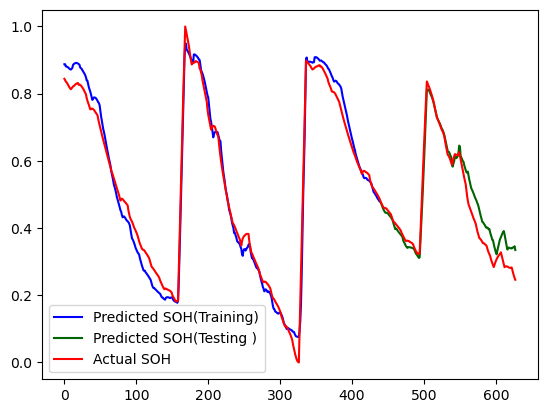

In [87]:
X_data = np.arange(439, 628)
                   
combined_datap = np.concatenate((trainPredict,valPredict, testPredict), axis=0)
combined_data = np.concatenate((y_train,y_val,y_test), axis=0)
plt.plot(trainPredict,color = 'blue', label = 'Predicted SOH(Training)')
z=np.concatenate((valPredict,testPredict), axis=0)
plt.plot( X_data,z,color = 'darkgreen', label = 'Predicted SOH(Testing )')
plt.plot(combined_data, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

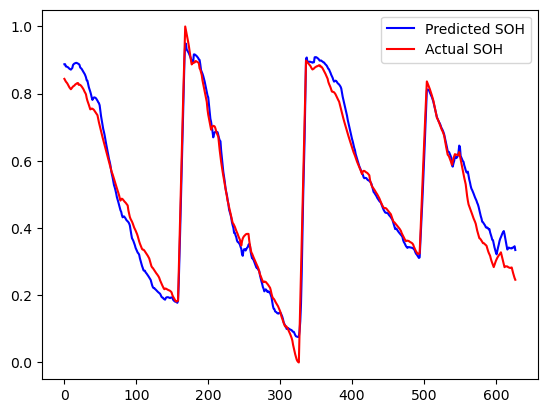

In [55]:
combined_datap = np.concatenate((trainPredict,valPredict, testPredict), axis=0)
combined_data = np.concatenate((y_train,y_val,y_test), axis=0)
plt.plot(combined_datap, color = 'blue', label = 'Predicted SOH')
plt.plot(combined_data, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

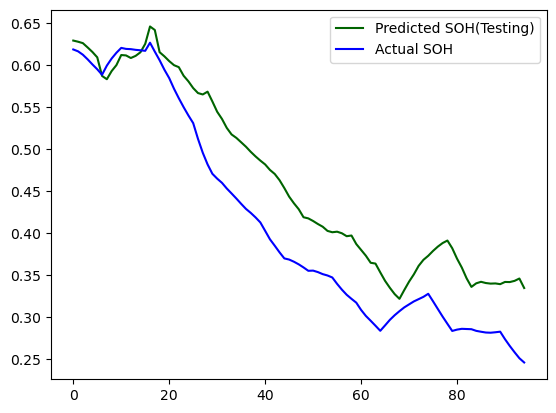

In [88]:
plt.plot(testPredict, color = 'darkgreen', label = 'Predicted SOH(Testing)')
plt.plot(y_test, color = 'blue', label = 'Actual SOH')

plt.legend()
plt.show()

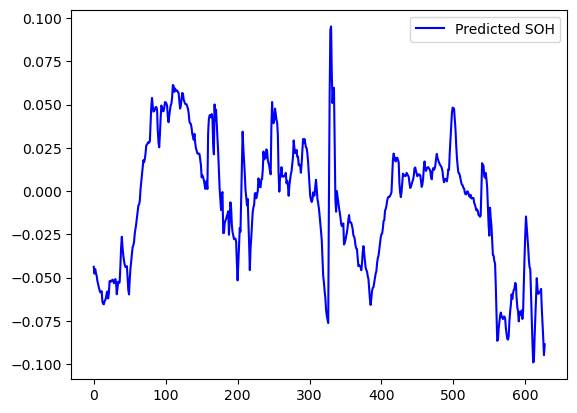

In [56]:
plt.plot(combined_data-combined_datap, color = 'blue', label = 'Predicted SOH')


plt.legend()
plt.show()  

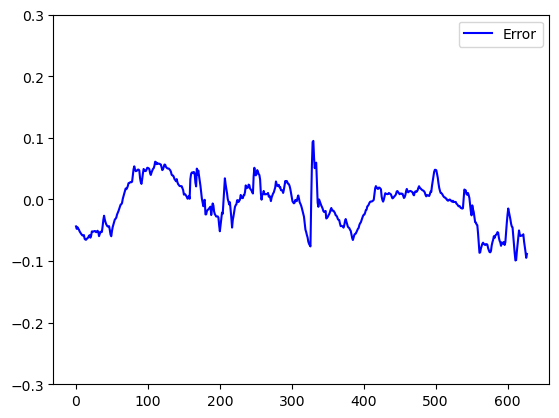

In [83]:
plt.plot(combined_data-combined_datap, color = 'blue', label = 'Error')


yticks_positions = [-0.3, -0.2,-0.1,0.0 ,0.1,0.2,0.3]
#yticks_labels = ['0%', '20%', '40%', '60%', '80%', '100%']

# Apply the yticks
#plt.yticks(yticks_positions, yticks_labels)
plt.yticks(yticks_positions)
plt.legend()
plt.show()  

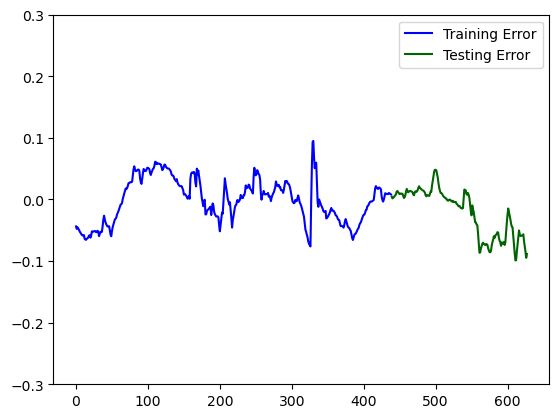

In [89]:
plt.plot(y_train-trainPredict, color = 'blue', label = 'Training Error')
#plt.plot(combined_data-combined_datap, color = 'blue', label = 'Error')
X_data = np.arange(439, 628)
z=np.concatenate((valPredict,testPredict), axis=0)
p=np.concatenate((y_val,y_test), axis=0)
plt.plot(X_data,p-z, color = 'darkgreen', label = 'Testing Error')
yticks_positions = [-0.3, -0.2,-0.1,0.0 ,0.1,0.2,0.3]
#yticks_labels = ['0%', '20%', '40%', '60%', '80%', '100%']

# Apply the yticks
#plt.yticks(yticks_positions, yticks_labels)
plt.yticks(yticks_positions)
plt.legend()
plt.show() 

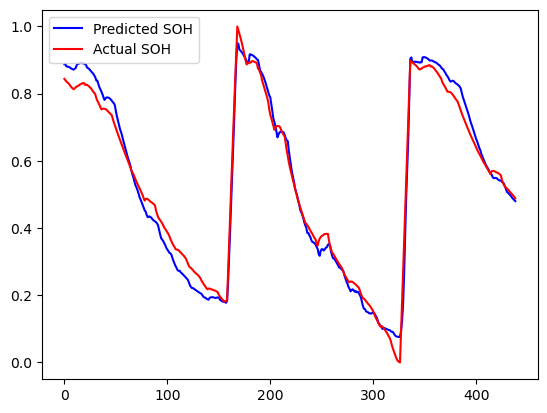

In [57]:
plt.plot(trainPredict, color = 'blue', label = 'Predicted SOH')
plt.plot(y_train, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

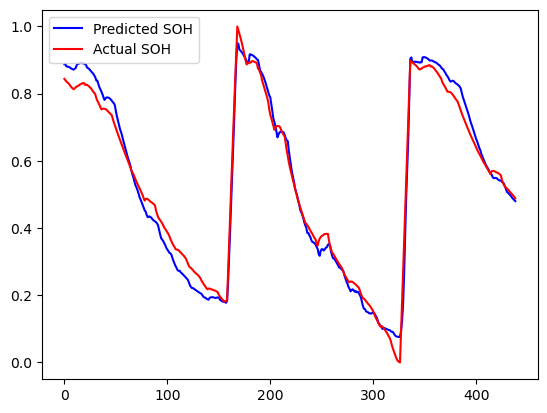

In [84]:
plt.plot(trainPredict, color = 'blue', label = 'Predicted SOH')
plt.plot(y_train, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

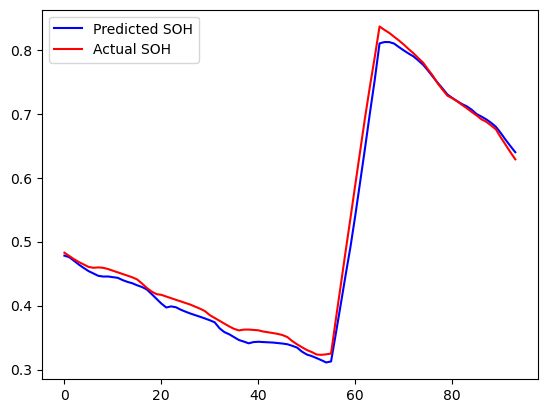

In [58]:
plt.plot(valPredict, color = 'blue', label = 'Predicted SOH')
plt.plot(y_val, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

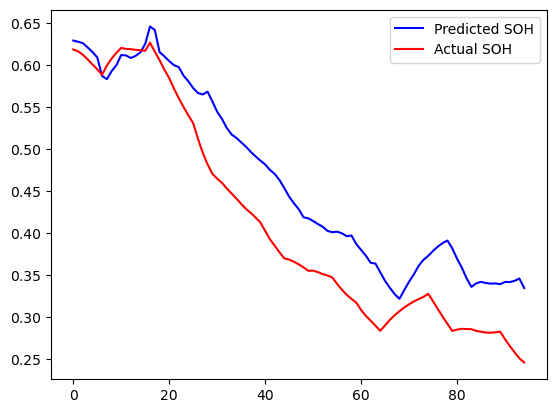

In [59]:
plt.plot(testPredict, color = 'blue', label = 'Predicted SOH')
plt.plot(y_test, color = 'red', label = 'Actual SOH')

plt.legend()
plt.show()

In [60]:
r2_score(combined_data, combined_datap)

0.9737175503678602

In [61]:
trainPredict

array([[0.88772 ],
       [0.887754],
       [0.88114 ],
       [0.880656],
       [0.879662],
       [0.878578],
       [0.876445],
       [0.874176],
       [0.872992],
       [0.87158 ],
       [0.874201],
       [0.876471],
       [0.88528 ],
       [0.888018],
       [0.889737],
       [0.890774],
       [0.891572],
       [0.891674],
       [0.890513],
       [0.889462],
       [0.888227],
       [0.885678],
       [0.878036],
       [0.875851],
       [0.873778],
       [0.869941],
       [0.866244],
       [0.862711],
       [0.859309],
       [0.854578],
       [0.848736],
       [0.839616],
       [0.838658],
       [0.829203],
       [0.819105],
       [0.812771],
       [0.805781],
       [0.79811 ],
       [0.788764],
       [0.781472],
       [0.786274],
       [0.788768],
       [0.788804],
       [0.787822],
       [0.786135],
       [0.782782],
       [0.779245],
       [0.77473 ],
       [0.771883],
       [0.765528],
       [0.748093],
       [0.732796],
       [0.72

In [62]:
X_data = np.arange(1, 170)


In [63]:
y_data = []

for i in range(1, 170):
    data = trainPredict[i]
    y_data.append(data)

y_data = np.array(y_data)

In [64]:
y_data1 = np.concatenate(trainPredict[1:170])
y_realt = np.concatenate(y_train[1:170])

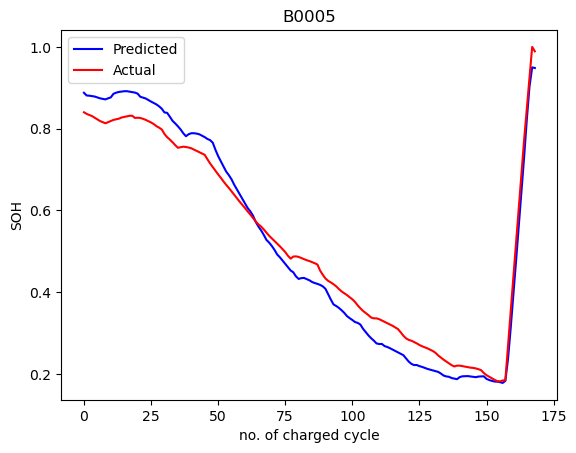

In [65]:
plt.plot(y_data ,color='blue', label='Predicted')

plt.plot(y_realt ,color='red', label='Actual')

plt.xlabel('no. of charged cycle')
plt.ylabel('SOH')
plt.title('B0005')
plt.legend()

# Displaying the plot
plt.show()

In [66]:


def sum_squared_error(y_real, y_pred):
    
    y_real = np.array(y_real)
    y_pred = np.array(y_pred)
    squared_errors = (y_real - y_pred) ** 2
    sum_squared_errors = np.sum(squared_errors)
    return sum_squared_errors

In [67]:
sse = sum_squared_error(y_realt, y_data1)
print("Sum of squared errors:", sse)

Sum of squared errors: 0.3196910227161088


In [68]:
def Slope(x, y, n):
    X = sum(x)
    Y = sum(y)
    XY = 0
    X2 = 0
    for i in range(n):
        XY = XY + (x[i] * y[i])
        X2 = X2 + (x[i] * x[i])
    m = (n * XY - X * Y) / (n * X2 - X * X)
    return m

def leastSquareLine(X, Y, n):
    m = Slope(X, Y, n)
    Xmean = sum(X) / n
    Ymean = sum(Y) / n
    c = Ymean - m * Xmean
    return m, c


n = len(X_data)
m, c = leastSquareLine(X_data, y_data, n)

print("Slope (m):", m)
print("Intercept (c):", c)


Slope (m): [-0.004357]
Intercept (c): [0.888349]


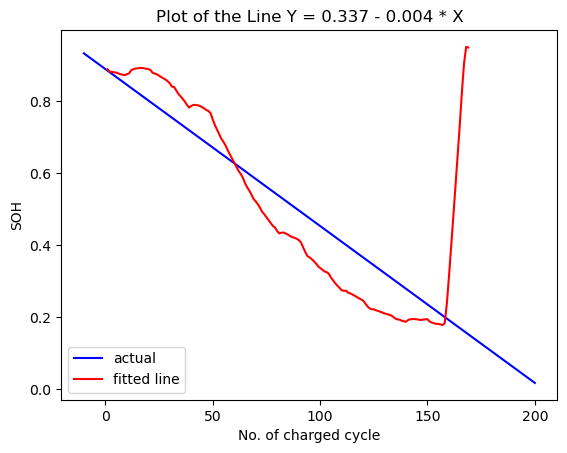

In [69]:
x_values = np.linspace(-10, 200, 100)
y_values = m * x_values + c

# Plotting the line
plt.plot(x_values, y_values, color='blue',label='actual')

# Plotting the data points
plt.plot(X_data, y_data, color='red',label='fitted line')

plt.ylabel('SOH')
plt.xlabel('No. of charged cycle')
plt.title('Plot of the Line Y = 0.337 - 0.004 * X')
plt.legend()


plt.show()


In [70]:
X_data = np.arange(1, 170)

In [71]:
y_data = []

for i in range(170, 170+169):
    data = trainPredict[i]
    y_data.append(data)

y_data = np.array(y_data)

In [72]:
y_data1 = np.concatenate(trainPredict[170:339])
y_realt = np.concatenate(y_train[170:339])

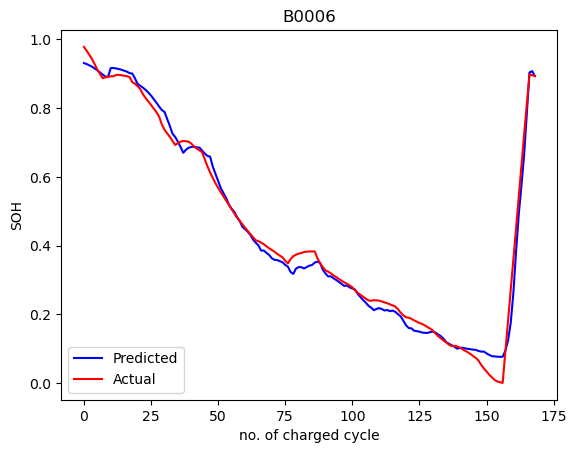

In [73]:
plt.plot(y_data ,color='blue', label='Predicted')

plt.plot(y_realt ,color='red', label='Actual')

plt.xlabel('no. of charged cycle')
plt.ylabel('SOH')
plt.title('B0006')
plt.legend()

# Displaying the plot
plt.show()

In [74]:

def sum_squared_error(y_real, y_pred):
    
    y_real = np.array(y_real)
    y_pred = np.array(y_pred)
    squared_errors = (y_real - y_pred) ** 2
    sum_squared_errors = np.sum(squared_errors)
    return sum_squared_errors

In [75]:
sse = sum_squared_error(y_realt, y_data1)
print("Sum of squared errors:", sse)

Sum of squared errors: 0.13770843269873734


In [76]:
def Slope(x, y, n):
    X = sum(x)
    Y = sum(y)
    XY = 0
    X2 = 0
    for i in range(n):
        XY = XY + (x[i] * y[i])
        X2 = X2 + (x[i] * x[i])
    m = (n * XY - X * Y) / (n * X2 - X * X)
    return m

def leastSquareLine(X, Y, n):
    m = Slope(X, Y, n)
    Xmean = sum(X) / n
    Ymean = sum(Y) / n
    c = Ymean - m * Xmean
    return m, c


n = len(X_data)
m, c = leastSquareLine(X_data, y_data, n)

print("Slope (m):", m)
print("Intercept (c):", c)


Slope (m): [-0.004658]
Intercept (c): [0.836533]


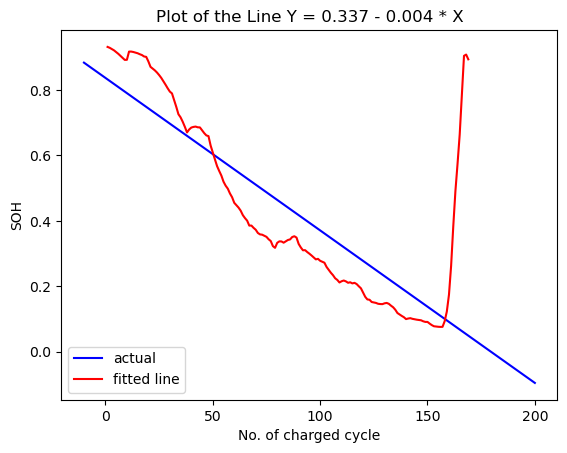

In [77]:
x_values = np.linspace(-10, 200, 100)
y_values = m * x_values + c

# Plotting the line
plt.plot(x_values, y_values, color='blue',label='actual')

# Plotting the data points
plt.plot(X_data, y_data, color='red',label='fitted line')

plt.ylabel('SOH')
plt.xlabel('No. of charged cycle')
plt.title('Plot of the Line Y = 0.337 - 0.004 * X')
plt.legend()


plt.show()


In [78]:
import tensorflow as tf

# Define and train your TensorFlow model
model = model

# Save the model in the SavedModel format
tf.saved_model.save(model, './saved_model')


INFO:tensorflow:Assets written to: ./saved_model\assets


INFO:tensorflow:Assets written to: ./saved_model\assets


In [79]:
import tensorflow as tf

# Define and train your TensorFlow model
model = model



In [80]:
# Save the model in the SavedModel format
tf.saved_model.save(model, './saved_model')

INFO:tensorflow:Assets written to: ./saved_model\assets


INFO:tensorflow:Assets written to: ./saved_model\assets


In [81]:
model.save('./saved_model')

INFO:tensorflow:Assets written to: ./saved_model\assets


INFO:tensorflow:Assets written to: ./saved_model\assets
